In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("iris.csv")
print(dataset.head(10))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa


In [ ]:
colunas = list(dataset.columns)
print(colunas)
colunas.pop(4)
print(colunas)
for col in colunas:
  x = np.array(dataset[col]).reshape(-1,1)
  x_normalized = MinMaxScaler().fit_transform(x)
  dataset[col] = x_normalized

print(dataset.head(10))

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
   sepal.length  sepal.width  petal.length  petal.width variety
0      0.222222     0.625000      0.067797     0.041667  Setosa
1      0.166667     0.416667      0.067797     0.041667  Setosa
2      0.111111     0.500000      0.050847     0.041667  Setosa
3      0.083333     0.458333      0.084746     0.041667  Setosa
4      0.194444     0.666667      0.067797     0.041667  Setosa
5      0.305556     0.791667      0.118644     0.125000  Setosa
6      0.083333     0.583333      0.067797     0.083333  Setosa
7      0.194444     0.583333      0.084746     0.041667  Setosa
8      0.027778     0.375000      0.067797     0.041667  Setosa
9      0.166667     0.458333      0.084746     0.000000  Setosa


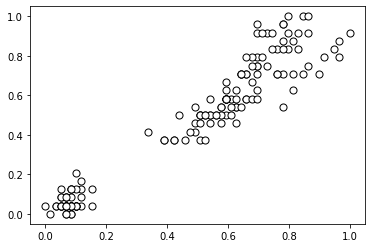

In [ ]:
X = np.array(dataset.drop(['variety'], axis=1))
# plot
plt.scatter(
   X[:, 2], X[:, 3],
   c='white', marker='o',
   edgecolor='black', s=50
)

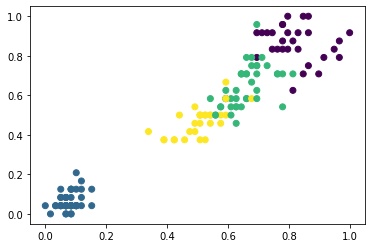

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)

plt.scatter(X[:,2], X[:,3], c = clusters)

**Método Elbow**

In [ ]:
def kmeans(numero_de_clusters, X):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(X)
  return [numero_de_clusters, modelo.inertia_]

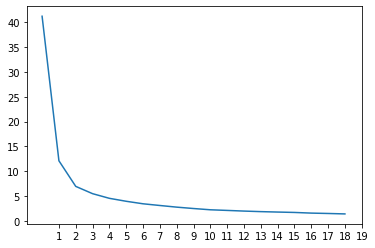

In [ ]:
resultado = [kmeans(numero_de_grupos, X) for numero_de_grupos in range(1,20)]
resultado = pd.DataFrame(resultado, columns=['grupos','inertia'])
resultado.inertia.plot(xticks=resultado.grupos)

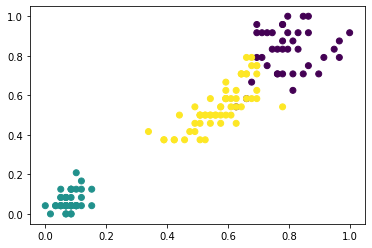

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

plt.scatter(X[:,2], X[:,3], c = clusters)

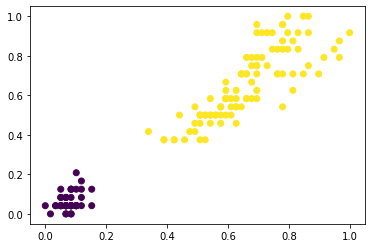

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X)

plt.scatter(X[:,2], X[:,3], c = clusters)